# Analisando os dados da Olist

Para a nossa segunda parte da aula, iremos trabalhar em cima de uma base de dados disponibilizada pela Olist, uma empresa de e-commerce. Essa base de dados
é composta por 9 tabelas, conforme o seguinte esquema:

<center>
<img src=banco_de_dados_olist.png width=700>
</center>

Essa base de dados é uma base mais segmentada e é o que mais se aproxima da análise de dados do dia-a-dia de uma pessoa que trabalha com dados no mundo corporativo. Com essas tabelas, precisaremos fazer manipulações de dados de forma mais minuciona que aquela que fizemos pela manhã. Vamos lá!

Para ter acesso à base de dados, acesse: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce, ou baixe através do link:

 https://drive.google.com/drive/folders/1RuibSOdMp-cR6niAdbH8bRIj3PO4EOlh?usp=sharing


# Coleta dos Dados

Nossa base de dados da Olist é composta por 9 tabelas diferentes, nelas temos informações de:
- pedidos (olist_orders_dataset)
- itens dos pedidos (olist_order_items_dataset)
- review dos usuários sobre os pedidos (olist_order_reviews_dataset)
- detalhes de pagamento dos pedidos (olist_order_payments_dataset)
- detalhes do consumidor que fez os pedidos (olist_customers_dataset)
- detalhes de geolocalização do consumidor (olist_geolocation_dataset)
- detalhes dos produtos (olist_products_dataset)
- detalhes dos vendedores (olist_sellers_dataset)

Nesta aula, iremos focar em três datasets, o de pedidos (olist_orders_dataset), itens do pedido (olist_order_items_dataset) e o de consumidor (olist_customers_dataset). Vamos lá!

In [1]:
import pandas as pd

Para a tabela de pedidos, iremos utilizar as seguintes colunas:

- **order_id**: Identificador do pedido
- **customer_id**: Identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de consumidor
- **order_status**: Status do pedido
- **order_purchase_timestamp**: timestamp que a compra foi feita
- **order_estimated_delivered_date**: data prevista para a entrega da compra ao cliente
- **order_delivered_customer_date**: timestamp que a compra foi entregue ao cliente

In [2]:
df_pedidos = pd.read_csv('dados/olist_orders_dataset.csv')
df_pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Vamos ver como estão nossos dados com o `describe`?

In [3]:
df_pedidos.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Para a tabela de itens dos pedidos, iremos utilizar as seguintes colunas:

- **order_id**: Identificador do pedido. Será a nossa chave com a tabela de pedidos
- **product_id**: Identificador do produto
- **seller_id**: Identificador do vendedor
- **shipping_limit_date**: timestamp limite para a entrega do pedido
- **price**: valor do pedido
- **freight_value**: valor do frete

In [4]:
df_itens_pedido = pd.read_csv('dados/olist_order_items_dataset.csv')
df_itens_pedido

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
df_itens_pedido.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Para a tabela de consumidor, iremos utilizar as seguintes colunas:

- **customer_id**: Identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de pedidos. 
- **customer_state**: Estado
- **customer_city**: Cidade

In [6]:
df_consumidor = pd.read_csv('dados/olist_customers_dataset.csv')
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
df_consumidor.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


## Joins entre tabelas

<img src="joins.png" text="https://www.youtube.com/watch?v=F2szczrXXqQ&list=PLNcg_FV9n7qZJqrKcUUCWCWPYCrlcVm9v&index=35" width=700px>

In [8]:
df_a = pd.DataFrame({'id_a': [1,2,3,4,8]})
df_a

,id_a
0,1
1,2
2,3
3,4
4,8


In [9]:
df_b = pd.DataFrame({'id_b': [1,2,3,4,5,6]})
df_b

,id_b
0,1
1,2
2,3
3,4
4,5
5,6


In [11]:
df_uniao = pd.merge(df_a, df_b, left_on='id_a', right_on='id_b', how='inner')
df_uniao

,id_a,id_b
0,1,1
1,2,2
2,3,3
3,4,4


In [14]:
df_esquerda = pd.merge(df_a, df_b, left_on='id_a', right_on='id_b', how='left')
df_esquerda

,id_a,id_b
0,1,1.0
1,2,2.0
2,3,3.0
3,4,4.0
4,8,NaN


In [13]:
df_direita = pd.merge(df_a, df_b, left_on='id_a', right_on='id_b', how='right')
df_direita

,id_a,id_b
0,1.0,1
1,2.0,2
2,3.0,3
3,4.0,4
4,NaN,5
5,NaN,6


In [12]:
df_tudo = pd.merge(df_a, df_b, left_on='id_a', right_on='id_b', how='outer')
df_tudo

,id_a,id_b
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,4.0,4.0
4,NaN,5.0
5,NaN,6.0
6,8.0,NaN


Vamos, agora, juntar a base de pedidos com a de itens. Quais tipos de join são os mais indicados para utilizarmos? Quais colunas devemos usar nesse merge? 

In [15]:
df_pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
df_itens_pedido.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_temp = df_pedidos.merge(df_itens_pedido, how= 'inner', left)

In [ ]:
df_temp = df_pedidos.merge(df_itens_pedido, how="inner", on="order_id")
df_temp.head()

**Atividade:**
Juntar a base de pedidos com a de consumidores. Quais tipos de join são os mais indicados para utilizarmos? Quais colunas devemos usar nesse merge? 

In [ ]:
df_consumidor.head()

In [17]:
df_temp2 = df_consumidor.merge(df_pedidos, how="inner", on="customer_id")
df_temp2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


# Objetivo da nossa Análise Exploratória:

Lembra que pela manhã comentamos a necessidade de estabelecer nossas perguntas para direcionar nossas análises? Para essa segunda parte da aula, buscaremos responder perguntas simples com base nessas 3 tabelas:

- Qual a frequência de compra dos clientes na plataforma da Olist no ano de 2017?
- Qual é o valor médio das compras desses clientes?  
- O número de vendas varia de acordo com a época do ano?
- O tempo limite de entrega das compras está sendo respeitado?

# Limpando os dados da Olist

## Pedidos

In [18]:
# Vamos entender um pouquinho melhor dos nossos dados
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Estamos lidando com um dataset relativamente grande, com quase 100.000 linhas. Temos dados nulos nas colunas de data,
o que faz sentido, pois nem todo o pedido realizado foi devidamente pago e finalizado. Por isso, algumas informações não estarão disponíveis. Por exemplo: um pedido que teve o pagamento negado, não terá dados de entrega. 

In [20]:
df_pedidos[df_pedidos.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [21]:
df_pedidos[df_pedidos.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Vamos começar nossa limpeza filtrando somente as colunas que desejamos utilizar


In [ ]:
columns_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']


Agora iremos filtrar somente aqueles pedidos que foram finalizados, mas antes é importante entender todos os status disponíveis que temos na base

Filtrando apenas os pedidos que foram entregues


Para fecharmos a limpeza dessa tabela de pedidos, precisamos criar uma coluna de mês e data de compra! Uma das perguntas que precisamos responder é se existe sazonalidade nas vendas, então, criar vamos criar uma coluna com a data (sem o horário) e outra truncada no início do mês para facilitar bastante nosso trabalho na etapa de análise:

In [31]:
# Vamos transformar nossas colunas de data (que estão como string) em data: 
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])
df_pedidos['order_estimated_delivery_date'] = pd.to_datetime(df_pedidos['order_estimated_delivery_date'])

In [32]:
# Agora sim, vamos criar uma coluna de data e de mês!
df_pedidos['reference_date'] = df_pedidos['order_purchase_timestamp'].dt.date
df_pedidos['reference_month'] = df_pedidos['order_purchase_timestamp'].dt.strftime('%Y-%m-01')
df_pedidos['reference_month'] = pd.to_datetime(df_pedidos['reference_month'])
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reference_date,reference_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,2018-02-01
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-09,2017-03-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02-06,2018-02-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-08-27,2017-08-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-08,2018-01-01


## Itens do Pedido

In [ ]:
# Vamos entender um pouquinho melhor dos nossos dados
df_itens_pedido.info()

Estamos lidando com um dataset um pouco maior que o de pedidos, o que faz sentido, pois nossa informação aqui está a nível de item, e um pedido pode ter 1 ou mais itens. Não temos dados nulos nessa tabela, mas isso não significa que aqui constam somente pedidos entregues, tá? Precisaremos filtrá-los em breve. 

## Consumidor

In [ ]:
# Vamos entender um pouquinho melhor dos nossos dados
df_consumidor.info()

In [ ]:
df_consumidor.head()

Se nós repararmos na coluna `customer_zip_code_prefix`, o pandas a reconheceu como numérica, mas na verdade ela deveria ser uma string. Poderíamos utilizar o método `zfill` para preencher os valores com zero, mas como não sabemos se eram zeros à direita ou à esquerda a melhor solução é importar esses dados forçando que a coluna seja uma string. Para isso iremos utilizar o parâmetro `dtype` dentro do método `read_csv`.

In [22]:
df_consumidor = pd.read_csv('dados/olist_customers_dataset.csv', dtype={"customer_zip_code_prefix": "string"})
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Essa coluna `customer_unique_id` não parece acrescentar nenhum informação, por isso vamos dropá-la!

In [23]:
df_consumidor = df_consumidor.drop('customer_unique_id', axis=1)
df_consumidor

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,03937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,06764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


## Juntando os três datasets

Agora que fizemos a limpeza dos nossos três datasets, chegou a hora de juntarmos de acordo com a coluna em comum em cada um deles. Um ponto importante 
aqui é que queremos manter as informações que correspondem somente à pedidos **finalizados**. 

Para unir os 3 datasets usaremos o método `merge()`, precisamos entender qual é a coluna em comum entre os 3: no nosso caso, serão as colunas customer_id e order_id. 



In [24]:
# Jutando os df pedidos e itens de pedidos
df_olist = pd.merge(df_pedidos, df_itens_pedido, on='order_id', how='inner')
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [25]:
# Jutando agora com os dados de consumidor
df_olist = pd.merge(df_olist, df_consumidor, on='customer_id', how='inner')
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,03149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,09195,santo andre,SP


In [26]:
# Exportando a base final
df_olist.to_csv('base_final_s14_olist.csv', index=False)

# Analisando os dados

Agora chegou a hora de respondermos as perguntas que estipulamos no começo dessa análise:
- Qual é o valor médio das compras desses clientes que tiveram os pedidos entregues?  
- O número de vendas finalizadas varia de acordo com a época do ano?
- O tempo limite de entrega das compras está sendo respeitado?

### Qual é o valor médio das compras desses clientes? E qual o valor médio pago em frete?


In [30]:
# Aqui estamos buscando uma estatística descritiva, podemos utilizar a nossa função describe() para trazer essas informações
df_olist.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [33]:
df_olist.price.mean()

np.float64(120.65373901464714)

Vamos dar uma olhada como é a distribuição dos preços?

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

O `histplot` divide os dados em intervalos (bins) e conta quantas observações caem em cada intervalo, criando um gráfico de barras que mostra a distribuição da variável, o famoso histograma.

Ele é utilizado para analisar a **distribuição de variáveis numéricas**.

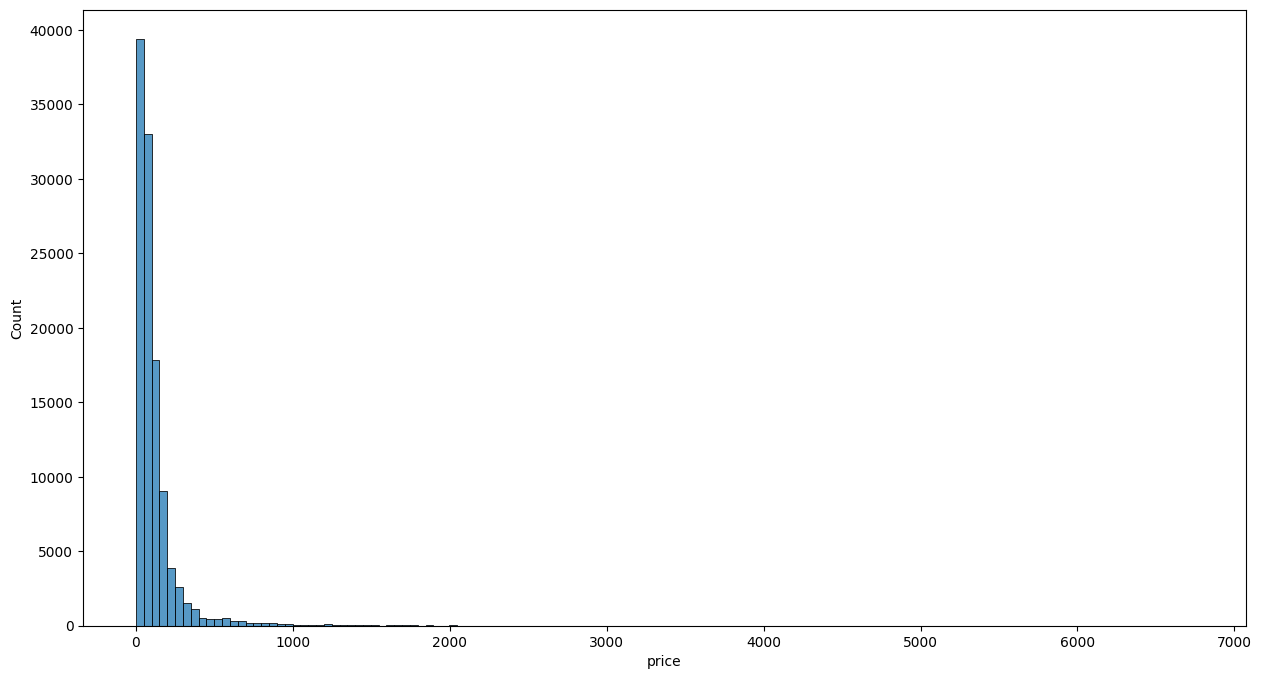

In [40]:
plt.figure(figsize=(15,8))
sns.histplot(df_olist.price, binwidth=50)
plt.show()

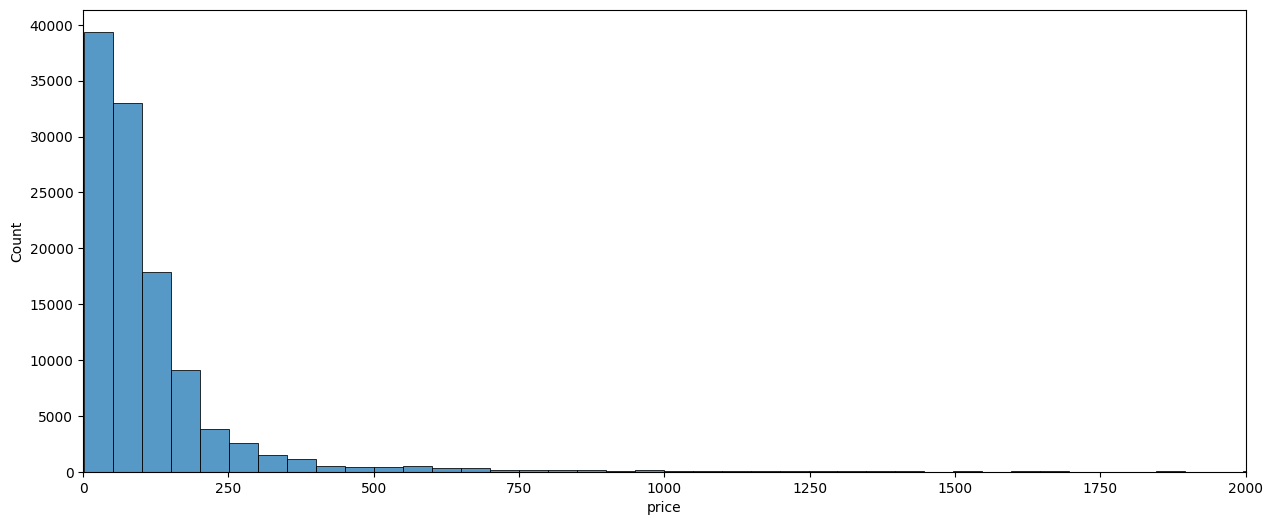

In [42]:
plt.figure(figsize=(15,6))
sns.histplot(df_olist.price, binwidth=50)
plt.xlim([0, 2000])
plt.show()

Apesar de termos pedidos com valores bem altos, como o caso do pedido no valor de R$ 6735, a média dos pedidos está cerca de 120 reais. O frete segue o mesmo padrão, sendo cerca de 10% do valor do pedido. 

Fazendo uma análise adicional aqui, pela coluna order_item_id, conseguimos observar a quantidade de itens que temos dentro de um pedido. A média de cada um desses pedidos é ter cerca de 1,2 itens. Sendo o seu máximo, um pedido que possui 21 itens iguais. 

### O número de vendas varia de acordo com a época do ano?

<img src=calendario-sazonalidades.jpg width=600>

Fonte: https://pagar.me/blog/como-lidar-com-a-sazonalidade-de-vendas-no-e-commerce/


Agora, vamos fazer uma análise de sazonalidade. Será que o número de vendas aumenta ou diminui de acordo com a época do ano?


In [41]:
df_olist.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,03149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,09195,santo andre,SP


In [47]:
df_ano_mes = df_olist.groupby('reference_month').agg({'order_id': 'nunique'})
df_ano_mes.sum()

KeyError: 'reference_month'

O `lineplot` é uma função usada para criar gráficos de linha, sendo particularmente útil para visualizar séries temporais, que são dados coletados em intervalos de tempo sequenciais. Gráficos de linha são uma escolha comum para representar como uma variável numérica muda ao longo do tempo.

Considerações: Se os dados forem coletados em diferentes frequências (diária, semanal, mensal), certifique-se de que eles estejam agregados ou preparados corretamente antes de criar o gráfico e certifique-se que os dados aparecem em ordem cronológica.

Não parece existir um padrão de vendas ao longo dos anos e a tendência de crescimento da curva, pode dificultar a visualização de uma sazonalidade mensal. Vamos agora analisar as vendas por dia.

Olhando esse gráfico o que podemos observar?

Parece que temos uma sazonalidade semanal nas vendas. Quais são os dias com mais e menos vendas?

Vamos agora agrupar nossos dados pelos meses do ano e ver se tem algum mês com mais frequência de vendas:

As vendas parecem cair nos meses finais do ano. Isso acontece em todos os anos?

Como podemos ver, os dados não estão completos nem para 2016 e nem 2018, dificultando nossa análise sobre quais meses vendem mais. O fato de termos uma tendência de crescimento e não termos os meses finais de 2018, fez com que o gráfico anterior aparentasse que havia uma maior venda nos meses iniciais dos anos. E essa conclusão estava errada.

### O tempo limite de entrega das compras está sendo respeitado?
Para essa análise, iremos criar uma classificação para o status do frete, sendo: ATRASADO, ADIANTADO e DENTRO DO ESPERADO utilizando as colunas `shipping_limit_dt` e `order_delivered_date`, e então iremos observar a proporção dos pedidos para cada status.

In [ ]:
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist['order_delivered_customer_date'])
df_olist['order_delivered_date'] = df_olist['order_delivered_customer_date'].dt.date

df_olist['shipping_limit_dt'] = pd.to_datetime(df_olist['shipping_limit_date']).dt.date

# condicional 
df_olist.loc[df_olist['order_delivered_date'] > df_olist['shipping_limit_dt'], 'status_entrega'] = 'ATRASADO'
df_olist.loc[df_olist['order_delivered_date'] < df_olist['shipping_limit_dt'], 'status_entrega'] = 'ADIANTADO'
df_olist.loc[df_olist['order_delivered_date'] == df_olist['shipping_limit_dt'], 'status_entrega'] = 'DENTRO DO ESPERADO'
df_olist

In [ ]:
df_olist["status_entrega"].value_counts(normalize=True)*100

Ou seja, cerca de 72% dos pedidos chegam atrasados na casa dos consumidores. É interessante entender o padrão aqui, esse status se mantém de acordo com a cidade? O quanto esse status mudaria se olhassemos para uma cidade grande tipo São Paulo? E por mês? Esses atrasos estão aumentando, diminuindo ou estão estáveis ao longo do tempo?

# Dinâmica: Explorando os dados da Olist

Para essa dinâmica, vocês terão 30 minutos para continuar explorando a base que criamos durante essa aula. A ideia é que vocês estipulem 3 a 5 perguntas simples (diferentes da que fizemos em aula) e faça as análises necessárias para chegar em sua resposta. 

# Dinâmica: Visualizações dos dados da Olist

Para essa dinâmica, vocês terão 40 minutos para criar as visualizações da base que criamos nessa aula (e com qualquer incremento que vocês fizeram à base na dinâmica anterior). 

Crie visualizações que te ajudem à responder as perguntas que vocês fizeram na dinâmica anterior. Utilize os conhecimentos da base da Netflix que fizemos pela manhã para criar seus próprios gráficos.


# Desafio da Semana

Objetivo: Sedimentar os conhecimentos de Análise de Dados que aprendemos nessa aula. 

Desafio: Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

Requisitos: 
- Formular o mínimo de 4 perguntas para responder com suas análises;
- Utilizar pelo menos 3 bases de dados da Olist (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais 2 tabelas para enriquecer sua análise.   
- Criar pelo menos 3 gráficos.
- Exporte sua base final.


Submeta uma pasta que contenha: 
- o arquivo .ipynb com sua análise exploratória rodada, ou seja, com as respostas aparecendo no notebook;
- interpretações observadas a partir dos gráficos dentro do notebook;
- a base final criada por você no formato .csv;
- especificar quais bases da olist foram usadas;
